In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
%matplotlib inline
#%matplotlib nbagg
from functools import partial
#import XFELDetAna.xfelpyanatools as xana
#import XFELDetAna.xfelpycaltools as xcal
#import XFELDetAna.agipdtools as agipd
#import XFELDetAna.xfelprofiler as xprof
#from mpldatacursor import datacursor
#profiler = xprof.Profiler()
#profiler.disable()

In [4]:
run = "r0491" # the run to get flat fields from
run_dark = "r0504" # dark data for high gain

channel = 15 # module number 0-Q1M1, 1-Q1M2, 2-Q1M3, 3-Q1M4.....14-Q4M3, 15-Q4M4
seq = 10
cells = 250 # number of readout cells in the train
proposal_nr=900091

# needed for opening the data files
file_temp = "/gpfs/exfel/exp/MID/201931/p{:06d}/raw/{}/RAW-{}-AGIPD{:02d}-S{:05d}.h5"
image_path_temp = "/INSTRUMENT/MID_DET_AGIPD1M-1/DET/{}CH0:xtdf/image/data"
train_path_temp = "/INSTRUMENT/MID_DET_AGIPD1M-1/DET/{}CH0:xtdf/image/trainId"
cell_path_temp = "/INSTRUMENT/MID_DET_AGIPD1M-1/DET/{}CH0:xtdf/image/cellId"
pulse_path_temp = "/INSTRUMENT/MID_DET_AGIPD1M-1/DET/{}CH0:xtdf/image/pulseId"


image_path = image_path_temp.format(channel)
train_path = train_path_temp.format(channel)
cell_path = cell_path_temp.format(channel)
pulse_path = pulse_path_temp.format(channel)

# open X-ray data
filename = file_temp.format(proposal_nr,run, run.upper(), channel, seq)
data_raw = {}
f = h5py.File(filename,'r')
data_raw['images'] = f[image_path][()]
data_raw['cellIDs'] = f[cell_path][:,0]
f.close()

# open dark data
seq = 0
proposal_nr=900091
filename = file_temp.format(proposal_nr,run_dark, run_dark.upper(), channel, seq)
print(filename)
data_dark = {}
f = h5py.File(filename,'r')
data_dark['images'] = f[image_path][()]
data_dark['cellIDs'] = f[cell_path][:,0]
f.close()

/gpfs/exfel/exp/MID/201931/p900091/raw/r0504/RAW-R0504-AGIPD15-S00000.h5


In [ ]:
idx = 1
f = plt.figure(figsize = (18,9))
plt.imshow(np.rot90(data_raw['images'][idx,0,:,:]), interpolation = 'none', vmin = 3000, vmax = 13000)
plt.title('Idx: {}'.format(idx))
plt.colorbar(orientation = 'horizontal')
f = plt.figure(figsize = (18,9))
plt.imshow(np.rot90(data_raw['images'][idx,1,:,:]), interpolation = 'none', vmin = 3000, vmax = 13000)
plt.title('Idx: {}'.format(idx))
plt.colorbar(orientation = 'horizontal')

In [ ]:
f = plt.figure(figsize = (12,6))
idx=0
inc = 250
xpix = 7
ypix = 31
plt.plot(data_raw['images'][idx::inc,0,xpix,ypix],"-")
plt.plot(data_raw['images'][idx+1::inc,0,xpix,ypix],"-")
plt.plot(data_raw['images'][idx+2::inc,0,xpix,ypix],"-")
plt.xlim(0,250)
plt.ylim(4000,5500)


In [5]:
#Calculate mean values of image and gain bit data
first_train=30
last_train=180
mean_cell = np.zeros((cells, 512, 128))
offset_cell = np.zeros((cells, 512, 128))
std_cell = np.zeros((cells, 512, 128))
mean_cell_gb = np.zeros((cells, 512, 128))
offset_cell_gb = np.zeros((cells, 512, 128))
std_cell_gb = np.zeros((cells, 512, 128))

for i in range(0,cells):
    mean_cell[i,:,:] = np.mean(data_raw['images'][i+first_train*cells:i+last_train*cells:cells,0,:,:],0)
    mean_cell_gb[i,:,:] = np.mean(data_raw['images'][i+first_train*cells:i+last_train*cells:cells,1,:,:],0)
    offset_cell[i,:,:] = np.mean(data_dark['images'][i+first_train*cells:i+last_train*cells:cells,0,:,:],0)
    offset_cell_gb[i,:,:] = np.mean(data_dark['images'][i+first_train*cells:i+last_train*cells:cells,1,:,:],0)
    std_cell[i,:,:] = np.std(data_dark['images'][i+first_train*cells:i+last_train*cells:cells,0,:,:],0)
    std_cell_gb[i,:,:] = np.std(data_dark['images'][i+first_train*cells:i+last_train*cells:cells,1,:,:],0)
    

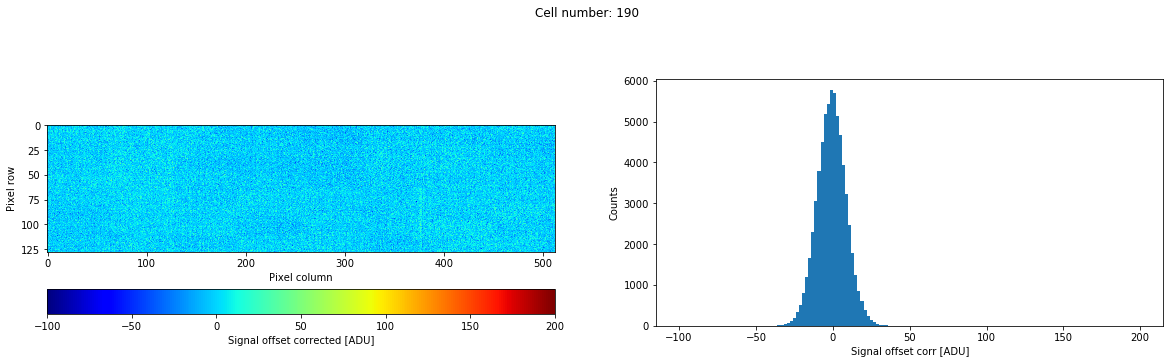

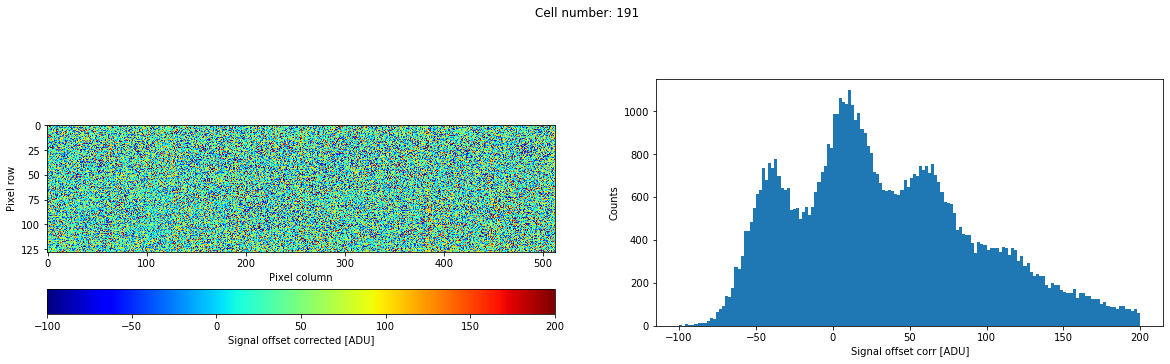

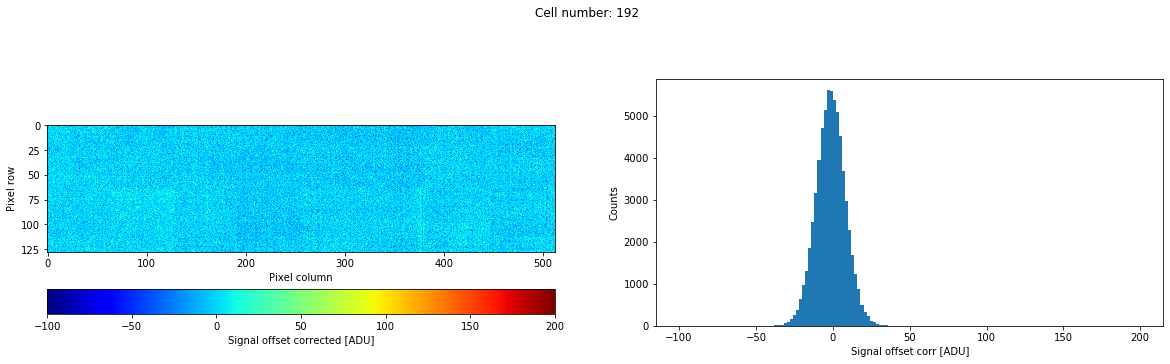

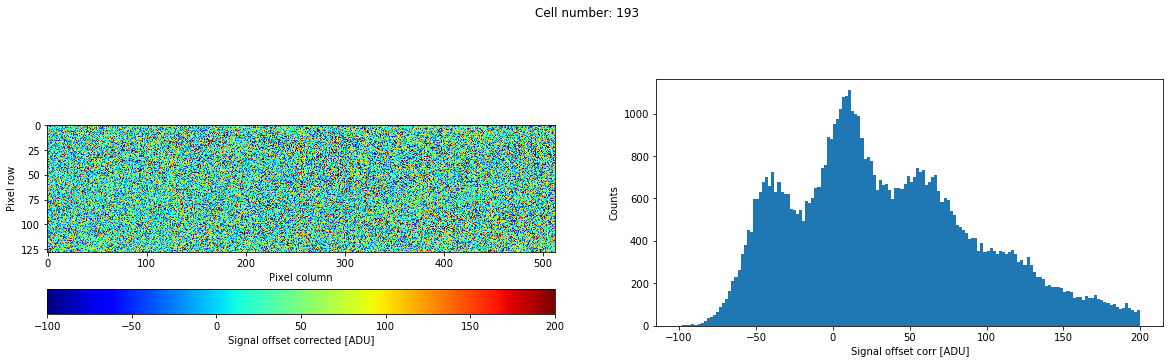

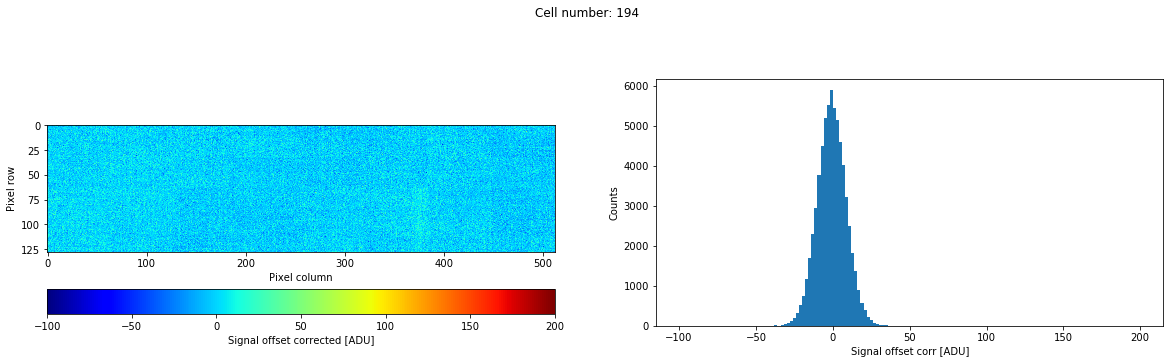

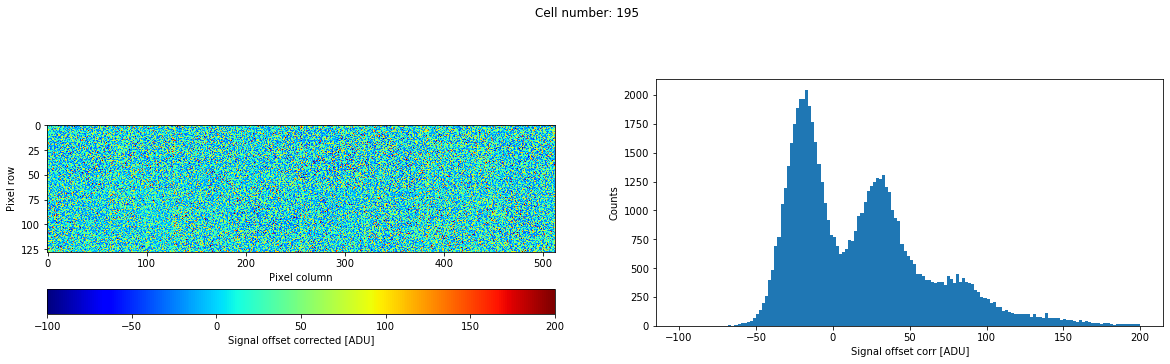

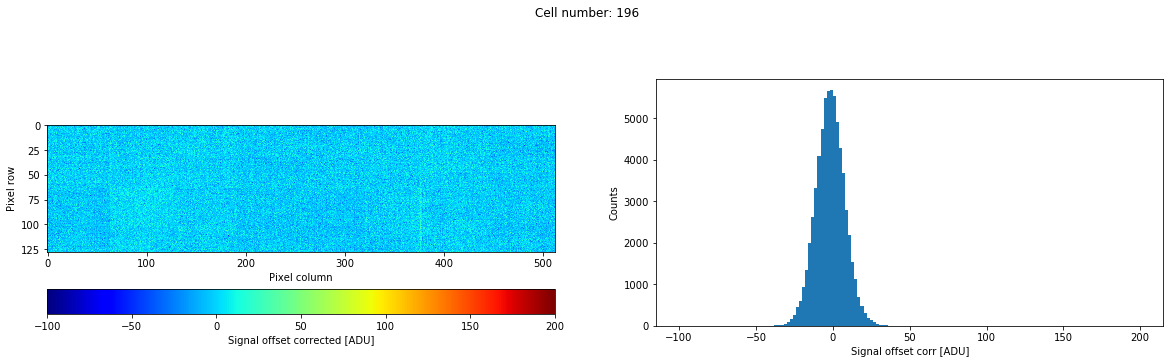

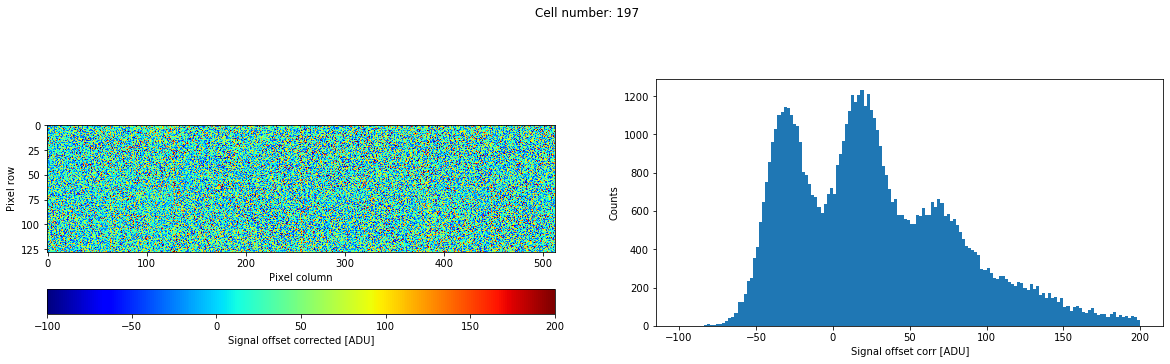

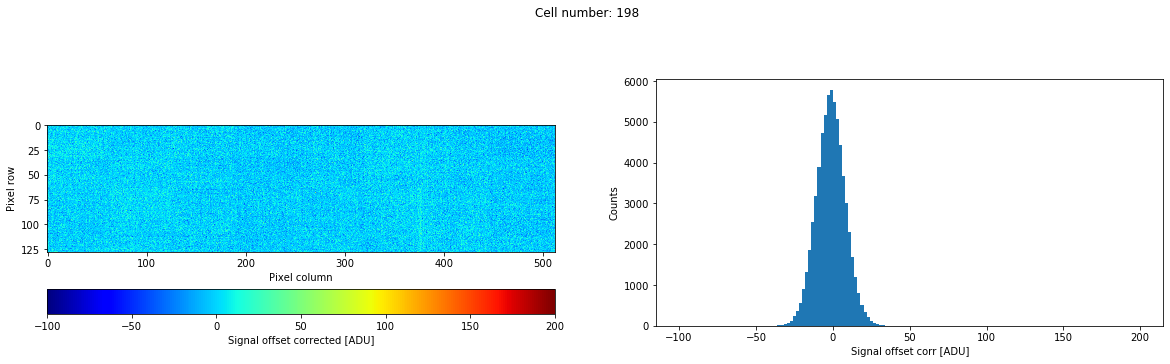

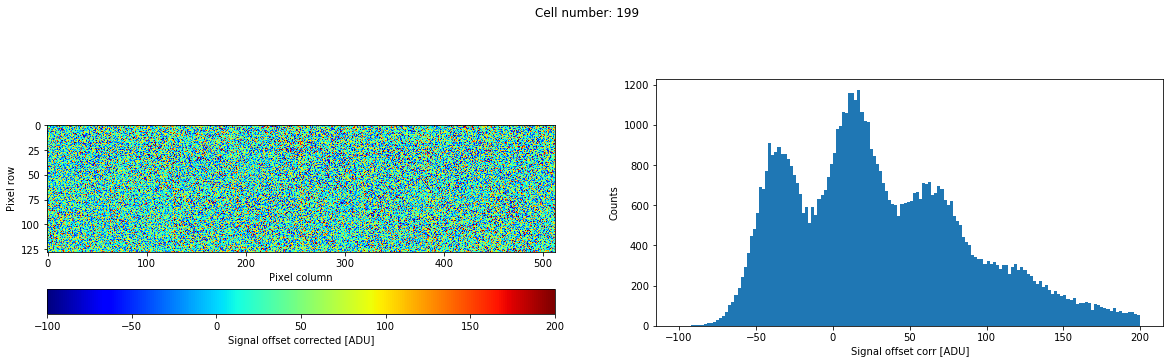

In [7]:
#plot single frames offset corrected
i= 1 # cell number
train = 250  #train nhumber 
for i in range(190,200):
    fig = plt.figure(figsize=(20,10))
    fig.suptitle('Cell number: {}'.format(i))
    ax0 = fig.add_subplot(221)
    im0=ax0.imshow(np.rot90(data_raw['images'][i+train*cells,0,:,:]-offset_cell[i]), 
                interpolation = 'none', 
                vmin = -100, vmax = 200,
                origin='upper',aspect=None,
                cmap=plt.get_cmap('jet'))
    plt.xlabel("Pixel column")
    plt.ylabel("Pixel row")
    cb = fig.colorbar(im0,orientation = 'horizontal')
    cb.set_label("Signal offset corrected [ADU]")
    
    ax1 = fig.add_subplot(222)
# histtype : {‘bar’, ‘barstacked’, ‘step’, ‘stepfilled’}
    #xana.histPlot(ax1,(data_raw['images'][i+train*cells,0,:,:]-offset_cell[i,:,:]).flatten(), 
    #              bins=150, range=[-100,200],
    #              log=False,color='red',histtype='stepfilled')
    ax1.hist((data_raw['images'][i+train*cells,0,:,:]-offset_cell[i,:,:]).flatten(), 
                  bins=150, range=[-100,200],)
    plt.xlabel("Signal offset corr [ADU]")
    plt.ylabel("Counts")   
    

In [ ]:
#plot single frames offset corrected
i= 1 # cell number
train = 145  #train nhumber 
for i in range(0,12):
    fig = plt.figure(figsize=(20,10))
    fig.suptitle('Cell number: {}'.format(i))
    ax0 = fig.add_subplot(221)
    im0=ax0.imshow(np.rot90(data_raw['images'][i+train*cells,1,:,:]-offset_cell_gb[i]), 
                interpolation = 'none', 
                vmin = -50, vmax = 50,
                origin='upper',aspect=None,
                cmap=plt.get_cmap('jet'))
    plt.xlabel("Pixel column")
    plt.ylabel("Pixel row")
    cb = fig.colorbar(im0,orientation = 'horizontal')
    cb.set_label("Signal offset corrected [ADU]")
    
    ax1 = fig.add_subplot(222)
# histtype : {‘bar’, ‘barstacked’, ‘step’, ‘stepfilled’}
    xana.histPlot(ax1,(data_raw['images'][i+train*cells,1,:,:]-offset_cell_gb[i]).flatten(), 
                  bins=150, range=[-50,1500],
                  log=True,color='red',histtype='stepfilled')
    plt.xlabel("Signal offset corr [ADU]")
    plt.ylabel("Counts")   

In [ ]:
for i in range(0, 7):
    f = plt.figure(figsize = (18,9))
    plt.imshow(np.rot90(mean_cell[i]-offset_cell[i]), 
               interpolation = 'none', 
               vmin = 0, vmax = 250, 
               cmap=plt.get_cmap('jet'))
    plt.title('Cell number: {}'.format(i))
    plt.colorbar(orientation = 'horizontal')
    

In [ ]:
mean_corr=[]
mean_corr=mean_cell-offset_cell
print(mean_corr.shape)
mean_mean_corr=np.mean(mean_corr[1:100],axis=0)
f = plt.figure(figsize = (18,18))
plt.imshow(np.rot90(mean_mean_corr[0:511,0:127]), 
           interpolation = 'none', vmin = 0, vmax = 250,
           cmap=plt.get_cmap('jet'))
plt.colorbar(orientation = 'horizontal')
 
mean_mean_corr2=np.mean(mean_corr[150:175],axis=0)
f = plt.figure(figsize = (18,18))
plt.imshow(np.rot90(mean_mean_corr2[0:511,0:127]), 
           interpolation = 'none', vmin = 0, vmax = 250,
           cmap=plt.get_cmap('jet'))
plt.colorbar(orientation = 'horizontal')
 

    

In [ ]:
for i in range(0,5):
    fig = plt.figure(figsize=(20,10))
    fig.suptitle('Cell number: {}'.format(i))
    ax0 = fig.add_subplot(221)
    im0=ax0.imshow(np.rot90(mean_cell[i]-offset_cell[i]), 
                   interpolation = 'none', 
                   vmin = -100, vmax = 1000,
                   origin='upper',aspect=None,
                   cmap=plt.get_cmap('rainbow'))
    plt.xlabel("Pixel column")
    plt.ylabel("Pixel row")
    cb = fig.colorbar(im0,orientation = 'horizontal')
    cb.set_label("Signal offset corrected [ADU]")
    
    ax1 = fig.add_subplot(222)
# histtype : {‘bar’, ‘barstacked’, ‘step’, ‘stepfilled’}
    xana.histPlot(ax1,(mean_cell[i]-offset_cell[i]).flatten(), 
                  bins=100, range=[-100,1000],log=True,color='red',histtype='stepfilled')
    plt.xlabel("Signal offset corr [ADU]")
    plt.ylabel("Counts")   
    
    ax2 = fig.add_subplot(223)
    im2=ax2.imshow(np.rot90(mean_cell_gb[i]-offset_cell_gb[i]), 
                   interpolation = 'none', 
                   vmin = -100, vmax = 100,
                   origin='upper',aspect=None,
                   cmap=plt.get_cmap('rainbow'))
    plt.xlabel("Pixel column")
    plt.ylabel("Pixel row")
    cb = fig.colorbar(im2,orientation = 'horizontal')
    cb.set_label("Gain bit - high gain bit offset [ADU]")
    
    ax3 = fig.add_subplot(224)
# histtype : {‘bar’, ‘barstacked’, ‘step’, ‘stepfilled’}
    xana.histPlot(ax3,(mean_cell_gb[i]-offset_cell_gb[i]).flatten(), 
                  bins=100, range=[-100,100],log=False,color='red',histtype='stepfilled')
    plt.xlabel(" Gain bit - high gain bit offset [ADU]")
    plt.ylabel("Counts")   

In [ ]:
for i in range(0,cells):
    f = plt.figure(figsize = (18,9))
    plt.imshow(np.rot90(mean_cell_gb[i]-offset_cell_gb[i]), interpolation = 'none', vmin = -100, vmax = 100)
    plt.title('Cell number: {}'.format(i))
    plt.colorbar(orientation = 'horizontal')

In [ ]:
#plot single pixel offset corrected
xmin=64*1
xmax=(64*1)+10
ymin=45
ymax=46
first_train=1
last_train=200
for i in range(0,5): #loop over cells
    fig = plt.figure(figsize=(20,10))
    fig.suptitle('Cell number: {}'.format(i))
    ax1 = fig.add_subplot(111)
# histtype : {‘bar’, ‘barstacked’, ‘step’, ‘stepfilled’}
    xana.histPlot(ax1,(data_raw['images'][i+first_train*cells:i+last_train*cells:cells,0,xmin:xmax,ymin:ymax]-offset_cell[i,xmin:xmax,ymin:ymax]).flatten(), 
                  bins=35, range=[-30,250],log=False,color='red',histtype='stepfilled')
    plt.xlabel("Signal offset corr [ADU]")
    plt.ylabel("Counts")   
